<a href="https://colab.research.google.com/github/jungmin0710/DataAnalysisBasic/blob/main/baseball2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#복습
#step 1)탐색
#그래프에서 한글 깨짐을 방지한다
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [5]:
%matplotlib inline 
#웹상에서 그림을 그릴 때 바로 볼수있게 함

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
picher = pd.read_csv('picher_stats_2017.csv')
batter = pd.read_csv('batter_stats_2017.csv')

In [7]:
picher.columns

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [8]:
batter.columns

Index(['선수명', '팀명', '경기', '타석', '타수', '안타', '홈런', '득점', '타점', '볼넷', '삼진', '도루',
       'BABIP', '타율', '출루율', '장타율', 'OPS', 'wOBA', 'WAR', '연봉(2018)',
       '연봉(2017)'],
      dtype='object')

In [9]:
picher.head(5)

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,8.95,2.13,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,7.43,1.85,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,7.36,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,8.04,1.95,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,7.49,2.11,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [11]:
batter.head(5)

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,삼진,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR,연봉(2018),연봉(2017)
0,최정,SK,130,527,430,136,46,89,113,70,107,1,0.316,0.316,0.427,0.684,1.111,0.442,7.30,120000,120000
1,최형우,KIA,142,629,514,176,26,98,120,96,82,0,0.362,0.342,0.450,0.576,1.026,0.430,7.20,150000,150000
2,박건우,두산,131,543,483,177,20,91,78,41,64,20,0.39,0.366,0.424,0.582,1.006,0.424,7.04,37000,19500
3,나성범,NC,125,561,498,173,24,103,99,48,116,17,0.413,0.347,0.415,0.584,0.999,0.416,5.64,43000,35000
4,손아섭,롯데,144,667,576,193,20,113,80,83,96,25,0.374,0.335,0.420,0.514,0.934,0.398,5.60,150000,65000


In [13]:
print(picher.shape)

(152, 22)


In [14]:
print(batter.shape)

(191, 21)


In [15]:
picher.tail(5)

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
147,장민재,한화,2,5,0,0,2,33,5,62.2,4.31,3.30,1.58,0.355,56.9,7.76,-1.21,6.21,6.48,-0.47,7100,8100
148,정용운,KIA,3,2,0,0,0,25,11,59.1,4.85,5.61,1.06,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,7500,3100
149,노경은,롯데,0,2,0,0,0,9,2,14.2,4.91,4.91,2.45,0.382,52.8,11.66,-0.83,8.03,8.29,-0.61,10000,16000
150,김승현,삼성,0,3,0,1,0,41,0,43.2,7.63,7.01,1.44,0.341,73.9,5.77,-0.40,6.87,6.95,-0.70,4000,2900
151,류희운,KT,4,4,0,0,0,24,14,81.0,5.78,5.89,2.00,0.312,65.3,7.67,-0.68,7.60,7.81,-1.01,4000,3000


In [16]:
batter.tail(5)

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,삼진,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR,연봉(2018),연봉(2017)
186,김민식,KIA,135,391,351,78,4,39,40,26,55,3,0.252,0.222,0.284,0.293,0.577,0.261,-1.07,15000,6000
187,장민석,한화,88,327,299,83,1,38,21,15,58,8,0.34,0.278,0.311,0.318,0.629,0.283,-1.08,11000,10000
188,채은성,LG,114,372,333,89,2,28,35,17,66,5,0.327,0.267,0.323,0.339,0.662,0.298,-1.12,11000,16000
189,김주형,KIA,57,116,106,18,0,11,10,8,13,0,0.191,0.170,0.233,0.217,0.450,0.210,-1.20,7500,11000
190,이동훈,한화,67,145,131,29,0,23,2,5,15,4,0.25,0.221,0.255,0.221,0.476,0.222,-1.32,3300,2800


In [18]:
picher['연봉(2018)'].describe()

count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

In [19]:
batter['연봉(2018)'].describe()

count       191.000000
mean      20625.654450
std       31978.855209
min        2700.000000
25%        4200.000000
50%        7500.000000
75%       25000.000000
max      250000.000000
Name: 연봉(2018), dtype: float64

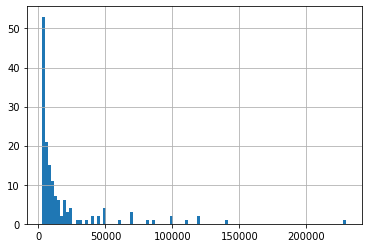

In [20]:
picher['연봉(2018)'].hist(bins = 100)

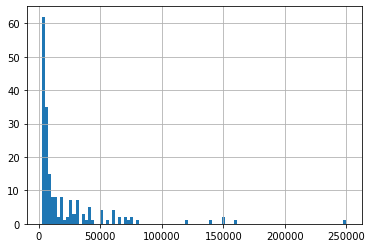

In [21]:
batter['연봉(2018)'].hist(bins = 100)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48393 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48393 missing from current font.
  font.set_text(s, 0, flags=flags)


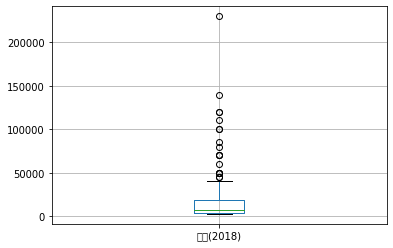

In [23]:
picher.boxplot(column=['연봉(2018)'])

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48393 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48393 missing from current font.
  font.set_text(s, 0, flags=flags)


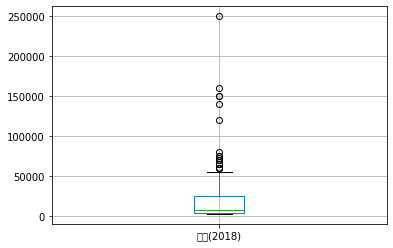

In [25]:
batter.boxplot(column=['연봉(2018)'])

In [26]:
# step 2) 예측
# 피처 스케일링(정규화)
#:피처 값들의 단위가 다를 경우 (예를들어 A:1~10까지/ B:1~100000000까지)
# 이를 0~1값 사이의 상대적 값으로 표현할 수 있게 수치를 맞춰주는 과정이 필요하다.
# 단위가 크게 차이나면 피처간의 절대적 값 차이 때문에 정확히 분석하기 어렵기 때문이다


In [28]:
pd.options.mode.chained_assignment = None
#pandas에서 특정 오류들이 발생시 skip하게 해주는 문구

# 스케일링 (정규화) 함수
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
    return df

#각각의 피처 값에 대한 스케일링을 수행한다
scale_columns = ['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2017)']
picher_df = standard_scaling(picher, scale_columns)


In [29]:
picher_df = picher_df.rename(columns={'연봉(2018)' : 'y'})
picher_df.head(10)

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,y,연봉(2017)
0,켈리,SK,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,0.672099,-0.869000,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705
1,소사,LG,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,0.134531,-0.987502,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303
2,양현종,KIA,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,0.109775,-0.885929,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881
3,차우찬,LG,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,0.350266,-0.945180,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592
4,레일리,롯데,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,0.155751,-0.877464,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705
5,피어밴드,KT,1.243035,2.185327,-0.306452,-0.585705,-0.543592,-0.147055,2.041816,2.048726,0.130995,-1.034057,-0.088425,-0.578820,0.653661,-0.721456,2.963100,-0.580874,-0.614039,2.476226,85000,0.738417
6,고영표,KT,1.243035,2.824115,-0.306452,-0.364245,-0.543592,-0.198678,1.836690,1.674951,0.314899,-1.338778,-0.373557,0.241539,-0.338437,-0.231854,1.037633,-0.869482,-0.886546,2.423284,11500,-0.451371
7,장원준,두산,2.795976,1.865933,-0.306452,-0.585705,-0.543592,0.007811,2.349505,2.448347,-0.286327,-0.691246,-0.599696,-0.533869,0.627780,-0.697456,3.375313,-0.666387,-0.598899,2.408158,100000,3.333592
8,함덕주,두산,1.501858,1.546539,-0.306452,-0.142784,-0.543592,0.317545,1.836690,1.593436,0.728685,0.002840,-0.678353,-0.219211,0.394853,-0.570256,2.133251,-0.853448,-0.942057,2.355216,16000,-0.379505
9,팻딘,KIA,1.501858,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.349505,2.366832,0.092092,-0.928251,-0.088425,0.140398,0.688169,-0.457455,2.496649,-0.457948,-0.467692,2.249332,70000,2.135819


In [30]:
#카테고리 피처(문자)는 정규화를 어떻게 하는가??? ex)과일 종류, 등급과 같은 범주형 피처(계산 무리무리)
#=> 원-핫 인코딩(대표적인 방법)

In [31]:
#팀명(카테고리, 범주형 피처)을 원-핫 인코딩한다(피처의 단위 맞춰주기)
team_encoding = pd.get_dummies(picher_df['팀명'])
picher_df = picher_df.drop('팀명',axis = 1)
picher_df = picher_df.join(team_encoding)
team_encoding.head()

,KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0


In [32]:
#학습 데이터와 테스트 데이터로 데이터 셋을 분리한다.
#학습데이터는 기존데이터, 테스트 데이터는 예측해나갈 데이터
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

X = picher_df[picher_df.columns.difference(['선수명','y'])]
y = picher_df['y']
#2018년 연봉이 y
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=19)
#train:학습데이터/test:테스트데이터


In [33]:
#회귀 분석 계수 학습(회귀 모델 학습)

lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)


In [34]:
picher_df.columns

Index(['선수명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9',
       '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', 'y',
       '연봉(2017)', 'KIA', 'KT', 'LG', 'NC', 'SK', '두산', '롯데', '삼성', '한화'],
      dtype='object')

In [36]:
picher_df.head()

,선수명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,y,연봉(2017),KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,켈리,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,0.672099,-0.869000,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705,0,0,0,0,1,0,0,0,0
1,소사,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,0.134531,-0.987502,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303,0,0,1,0,0,0,0,0,0
2,양현종,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,0.109775,-0.885929,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881,1,0,0,0,0,0,0,0,0
3,차우찬,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,0.350266,-0.945180,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592,0,0,1,0,0,0,0,0,0
4,레일리,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,0.155751,-0.877464,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705,0,0,0,0,0,0,1,0,0


In [37]:
print(lr.coef_)

[ -1481.01733901   -416.68736601 -94136.23649209  -1560.86205158
   1572.00472193   -747.04952389  -1375.53830289   -523.54687556
   3959.10653661    898.37638984  10272.48746451  77672.53804469
  -2434.38947427   -892.11801281    449.91117164   7612.15661812
   1271.04500059  -2810.5564514    5396.97279896  -4797.30275904
   -250.69773139    236.02530053  19130.59021357    854.02604585
   1301.61974637   3613.84063182   -935.07281796  18144.60099745]


In [42]:
#########
#보충
picher = pd.read_csv("picher_stats_2017.csv")
picher = picher[['선수명','연봉(2017)','연봉(2018)']]

In [43]:
picher.head()

,선수명,연봉(2017),연봉(2018)
0,켈리,85000,140000
1,소사,50000,120000
2,양현종,150000,230000
3,차우찬,100000,100000
4,레일리,85000,111000


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54788 missing from current font.
  font.set_

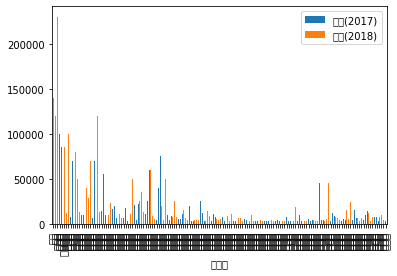

In [45]:
picher.plot(x = '선수명', y = ['연봉(2017)','연봉(2018)'], kind = 'bar')